Connected to xai (Python 3.8.0)

In [1]:
from utils import DataLoader

import matplotlib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
data_loader = DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()
# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()
# Oversample the train data
X_train, y_train = data_loader.oversample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)

(7778, 21)
(1022, 21)


In [3]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")
# TODO: Other models

F1 Score 0.5471372488047577
Accuracy 0.9442270058708415


In [4]:
# Shapley additive explainations
explainer = shap.TreeExplainer(rf)
# Calculate shapley values for test data
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi
2813,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,43.0,0,0,91.13,33.9


In [5]:
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)
shap_values

(1, 21)


[array([[ 6.67504114e-03,  7.02287125e-03, -9.51595655e-07,
         -3.48667292e-03, -3.96368749e-03,  1.86410935e-04,
         -1.69748997e-05,  3.53398225e-03,  8.97663850e-03,
         -3.16984967e-03,  6.94845672e-03,  7.55976119e-03,
         -1.78037009e-03,  1.50078780e-02,  1.84776664e-02,
          4.15824120e-03,  2.33286169e-01,  1.28608326e-02,
          9.60384701e-03,  9.59247746e-02,  8.21920793e-02]]),
 array([[-6.67504114e-03, -7.02287125e-03,  9.51595655e-07,
          3.48667292e-03,  3.96368749e-03, -1.86410935e-04,
          1.69748997e-05, -3.53398225e-03, -8.97663850e-03,
          3.16984967e-03, -6.94845672e-03, -7.55976119e-03,
          1.78037009e-03, -1.50078780e-02, -1.84776664e-02,
         -4.15824120e-03, -2.33286169e-01, -1.28608326e-02,
         -9.60384701e-03, -9.59247746e-02, -8.21920793e-02]])]

The RF predicted: 0


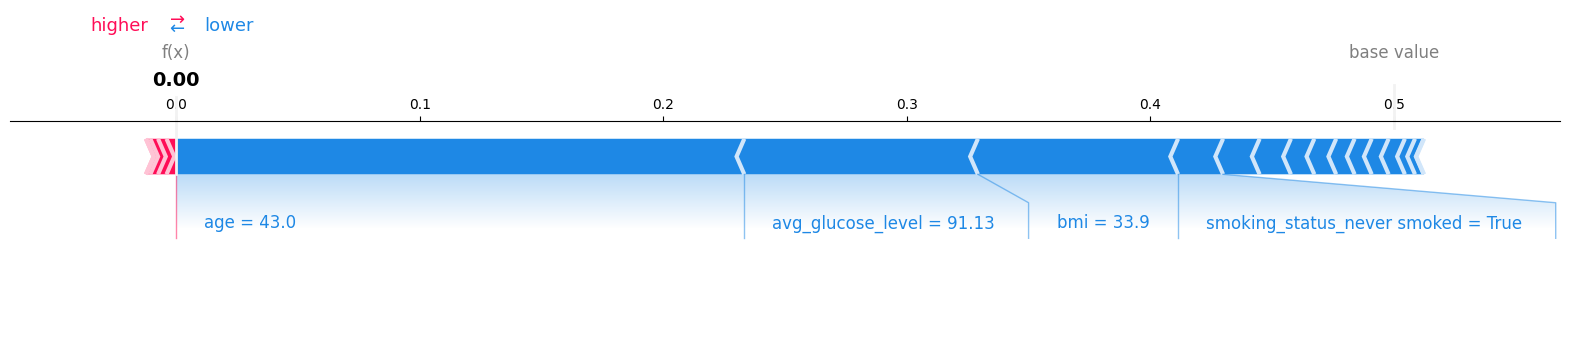

In [6]:
shap.initjs()
# Force plot
prediction = rf.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index],
                matplotlib=matplotlib) # for values

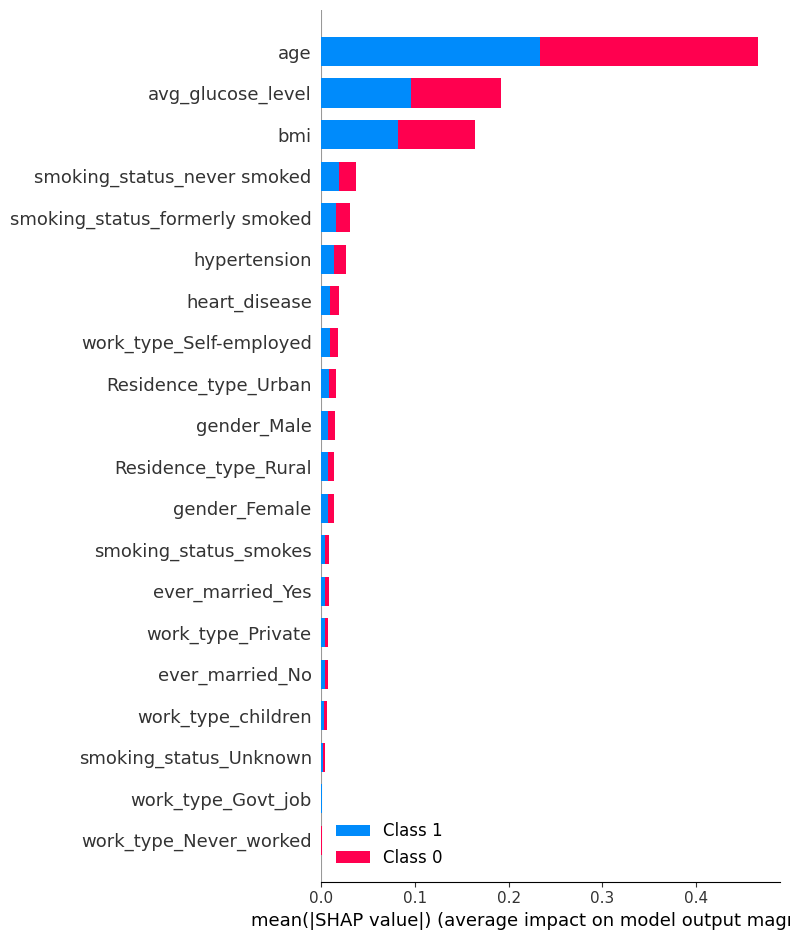

In [7]:
# Feature summary
shap.summary_plot(shap_values, X_test)

In [8]:
explains = explainer(X_test)

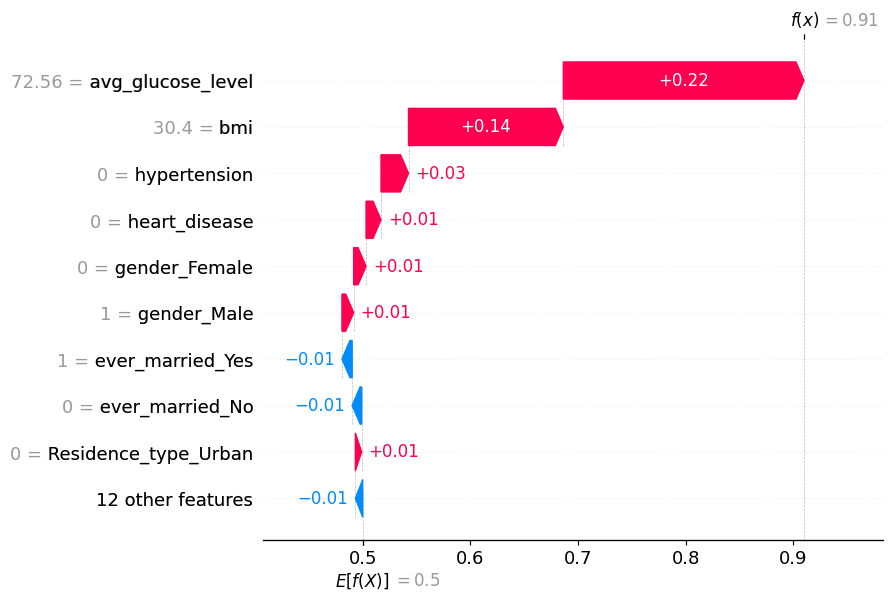

In [9]:
shap.plots.waterfall(explains[0][:, 0])
# TODO: Try other plots and other models